In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/frankhigley/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/frankhigley/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


initialize sentimentIntensityAnalyser()

In [2]:
sia = SentimentIntensityAnalyzer()

Sentiment analysis function:
- uses tqdm for progress bar
- iterated through all data and if the data is string perform sentiment analysis
- the based of the compounded number the comment is either positive negaive or neutral
- return the sentiment array for each file this array consists of ones, zeros, and negative ones

In [3]:
def sentiment_analysis(data, sia):
   #results
    sent = []

    # run sentiment analysis
    for i, row in tqdm(data.iterrows(), total=len(data)):
        comment = row['Comments']

        #check if comment is a string
        if isinstance(comment, str):
            res = sia.polarity_scores(comment)
            compound = res.get('compound', None)
            if compound is not None:
                if compound > 0:
                    sentiment = 1
                elif compound < 0:
                    sentiment = -1
                else:
                    sentiment = 0

                sent.append(sentiment)    

    return sent

In [8]:
def get_sent_totals(sent):
    pos = 0
    neg = 0
    neu = 0

    for i in sent:
        if i == 1:
            pos += 1
        if i == -1:
            neg += 1
        else:
            neu +=1

    return pos, neu, neg

Runs sentiment analysis on a given file path returns the number of positive, negative, and neutral comments.

In [4]:
def run_sentiment_analysis(path):
    data = pd.read_csv(path)
    sentiment = sentiment_analysis(data, sia)
    numpos, numneu, numneg = get_sent_totals(sentiment)

    return numpos, numneu, numneg


Create data file array

In [5]:
clean_csv_files = ['../data/CleanCSV/beauty_comments_clean.csv',
            '../data/CleanCSV/controversial_comments_clean.csv',
            '../data/CleanCSV/gaming_comments_clean.csv',
            '../data/CleanCSV/music_comments_clean.csv',
            '../data/CleanCSV/reaction_comments_clean.csv',
            '../data/CleanCSV/vlog_comments_clean.csv']

In [6]:
raw_csv_files = ['../data/RawCSV/beauty_comments.csv',
                 '../data/RawCSV/controversial_comments.csv',
                 '../data/RawCSV/gaming_comments.csv',
                 '../data/RawCSV/music_comments.csv',
                 '../data/RawCSV/reaction_comments.csv',
                 '../data/RawCSV/vlog_comments.csv']

Run sentiment analysis on each dataset

In [21]:

beauty_sent_totals_clean = run_sentiment_analysis(clean_csv_files[0])
controversial_sent_totals_clean = run_sentiment_analysis(clean_csv_files[1])
gaming_sent_totals_clean = run_sentiment_analysis(clean_csv_files[2])
music_sent_totals_clean = run_sentiment_analysis(clean_csv_files[3])
reaction_sent_totals_clean = run_sentiment_analysis(clean_csv_files[4])
vlog_sent_totals_clean = run_sentiment_analysis(clean_csv_files[5])


  0%|          | 0/3136 [00:00<?, ?it/s]

  0%|          | 0/2235 [00:00<?, ?it/s]

  0%|          | 0/33370 [00:00<?, ?it/s]

  0%|          | 0/33501 [00:00<?, ?it/s]

  0%|          | 0/1581 [00:00<?, ?it/s]

  0%|          | 0/24479 [00:00<?, ?it/s]

In [22]:
beauty_sent_totals_raw = run_sentiment_analysis(raw_csv_files[0])
controversial_sent_totals_raw = run_sentiment_analysis(raw_csv_files[1])
gaming_sent_totals_raw = run_sentiment_analysis(raw_csv_files[2])
music_sent_totals_raw = run_sentiment_analysis(raw_csv_files[3])
reaction_sent_totals_raw = run_sentiment_analysis(raw_csv_files[4])
vlog_sent_totals_raw = run_sentiment_analysis(raw_csv_files[5])

  0%|          | 0/57587 [00:00<?, ?it/s]

  0%|          | 0/93584 [00:00<?, ?it/s]

  0%|          | 0/246826 [00:00<?, ?it/s]

  0%|          | 0/238386 [00:00<?, ?it/s]

  0%|          | 0/22207 [00:00<?, ?it/s]

  0%|          | 0/222522 [00:00<?, ?it/s]

Print results

In [11]:
print("Beauty:\n \tPositive:" , beauty_sent_totals_clean[0], "\n\tNeutral:", beauty_sent_totals_clean[1], "\n\tNegative:", beauty_sent_totals_clean[2], "\n\tTotal:", sum(beauty_sent_totals_clean))
print("Contraversial:\n \tPositive:" , controversial_sent_totals_clean[0], "\n\tNeutral:", controversial_sent_totals_clean[1], "\n\tNegative:", controversial_sent_totals_clean[2], "\n\tTotal:", sum(controversial_sent_totals_clean))
print("Gaming:\n \tPositive:" , gaming_sent_totals_clean[0], "\n\tNeutral:", gaming_sent_totals_clean[1], "\n\tNegative:", gaming_sent_totals_clean[2], "\n\tTotal:", sum(gaming_sent_totals_clean))
print("Music:\n \tPositive:" , music_sent_totals_clean[0], "\n\tNeutral:", music_sent_totals_clean[1], "\n\tNegative:", music_sent_totals_clean[2], "\n\tTotal:", sum(music_sent_totals_clean))
print("Reaction:\n \tPositive:" , reaction_sent_totals_clean[0], "\n\tNeutral:", reaction_sent_totals_clean[1], "\n\tNegative:", reaction_sent_totals_clean[2], "\n\tTotal:", sum(reaction_sent_totals_clean))
print("Vlog:\n \tPositive:" , vlog_sent_totals_clean[0], "\n\tNeutral:", vlog_sent_totals_clean[1], "\n\tNegative:", vlog_sent_totals_clean[2], "\n\tTotal:", sum(vlog_sent_totals_clean))

Beauty:
 	Positive: 1528 
	Neutral: 2843 
	Negative: 293 
	Total: 4664
Contraversial:
 	Positive: 882 
	Neutral: 1995 
	Negative: 240 
	Total: 3117
Gaming:
 	Positive: 14790 
	Neutral: 31543 
	Negative: 1827 
	Total: 48160
Music:
 	Positive: 5706 
	Neutral: 32670 
	Negative: 818 
	Total: 39194
Reaction:
 	Positive: 351 
	Neutral: 1463 
	Negative: 118 
	Total: 1932
Vlog:
 	Positive: 10775 
	Neutral: 22683 
	Negative: 1796 
	Total: 35254


In [12]:
print("Beauty Raw:\n \tPositive:" , beauty_sent_totals_raw[0], "\n\tNeutral:", beauty_sent_totals_raw[1], "\n\tNegative:", beauty_sent_totals_raw[2], "\n\tTotal:", sum(beauty_sent_totals_raw))
print("Contraversial Raw:\n \tPositive:" , controversial_sent_totals_raw[0], "\n\tNeutral:", controversial_sent_totals_raw[1], "\n\tNegative:", controversial_sent_totals_raw[2], "\n\tTotal:", sum(controversial_sent_totals_raw))
print("Gaming Raw:\n \tPositive:" , gaming_sent_totals_raw[0], "\n\tNeutral:", gaming_sent_totals_raw[1], "\n\tNegative:", gaming_sent_totals_raw[2], "\n\tTotal:", sum(gaming_sent_totals_raw))
print("Music Raw:\n \tPositive:" , music_sent_totals_raw[0], "\n\tNeutral:", music_sent_totals_raw[1], "\n\tNegative:", music_sent_totals_raw[2], "\n\tTotal:", sum(music_sent_totals_raw))
print("Reaction Raw:\n \tPositive:" , reaction_sent_totals_raw[0], "\n\tNeutral:", reaction_sent_totals_raw[1], "\n\tNegative:", reaction_sent_totals_raw[2], "\n\tTotal:", sum(reaction_sent_totals_raw))
print("Vlog Raw:\n \tPositive:" , vlog_sent_totals_raw[0], "\n\tNeutral:", vlog_sent_totals_raw[1], "\n\tNegative:", vlog_sent_totals_raw[2], "\n\tTotal:", sum(vlog_sent_totals_raw))

Beauty Raw:
 	Positive: 40296 
	Neutral: 49446 
	Negative: 8122 
	Total: 97864
Contraversial Raw:
 	Positive: 32494 
	Neutral: 53762 
	Negative: 39822 
	Total: 126078
Gaming Raw:
 	Positive: 128935 
	Neutral: 220241 
	Negative: 26140 
	Total: 375316
Music Raw:
 	Positive: 67076 
	Neutral: 218765 
	Negative: 19621 
	Total: 305462
Reaction Raw:
 	Positive: 9798 
	Neutral: 18602 
	Negative: 3605 
	Total: 32005
Vlog Raw:
 	Positive: 106208 
	Neutral: 191400 
	Negative: 30713 
	Total: 328321


# Cleaned pi charts

Text(0.5, 1.0, 'Semtiment for Cleaned Beauty Comments')

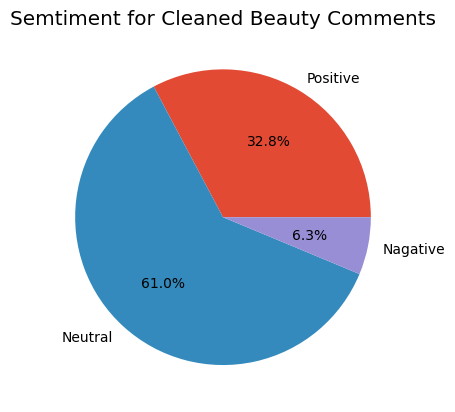

In [26]:
labels = ['Positive', 'Neutral', 'Nagative']
cb_sizes = [beauty_sent_totals_clean[0] / sum(beauty_sent_totals_clean), beauty_sent_totals_clean[1] / sum(beauty_sent_totals_clean), beauty_sent_totals_clean[2] / sum(beauty_sent_totals_clean)]

fig, ax = plt.subplots()
ax.pie(cb_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Semtiment for Cleaned Beauty Comments")

Text(0.5, 1.0, 'Sentiment for Cleaned Controvesail Comments')

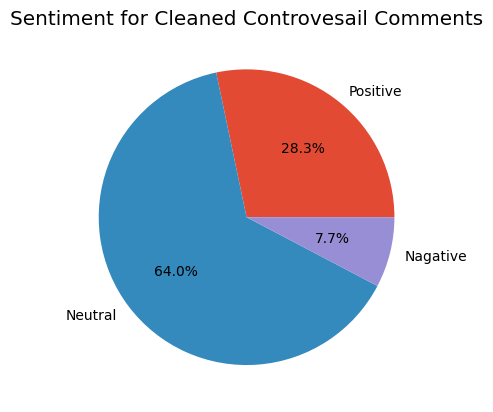

In [29]:
cc_sizes = [controversial_sent_totals_clean[0] / sum(controversial_sent_totals_clean), controversial_sent_totals_clean[1] / sum(controversial_sent_totals_clean), controversial_sent_totals_clean[2] / sum(controversial_sent_totals_clean)]
fig, ax = plt.subplots()
ax.pie(cc_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Cleaned Controversail Comments")

Text(0.5, 1.0, 'Sentiment for Cleaned Gaming Comments')

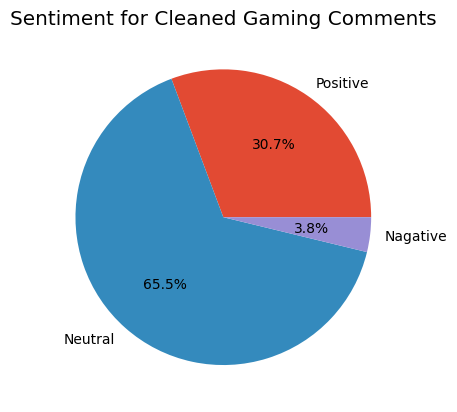

In [28]:
cg_sizes = [gaming_sent_totals_clean[0] / sum(gaming_sent_totals_clean), gaming_sent_totals_clean[1] / sum(gaming_sent_totals_clean), gaming_sent_totals_clean[2] / sum(gaming_sent_totals_clean)]
fig, ax = plt.subplots()
ax.pie(cg_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Cleaned Gaming Comments")

Text(0.5, 1.0, 'Sentiment for Cleaned Music Comments')

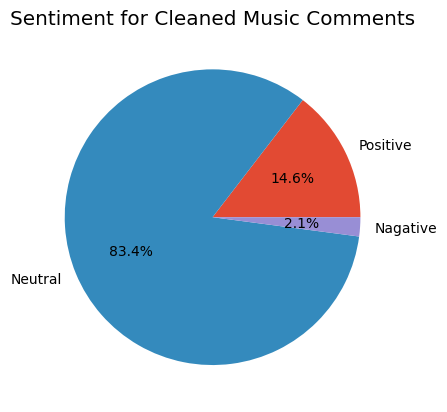

In [30]:
cm_sizes = [music_sent_totals_clean[0] / sum(music_sent_totals_clean), music_sent_totals_clean[1] / sum(music_sent_totals_clean), music_sent_totals_clean[2] / sum(music_sent_totals_clean)]
fig, ax = plt.subplots()
ax.pie(cm_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Cleaned Music Comments")

Text(0.5, 1.0, 'Sentiment for Cleaned Reaction Comments')

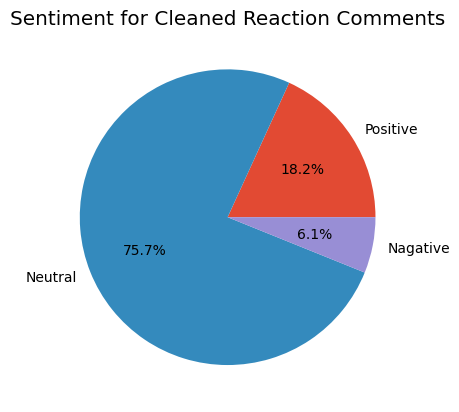

In [31]:
cr_sizes = [reaction_sent_totals_clean[0] / sum(reaction_sent_totals_clean), reaction_sent_totals_clean[1] / sum(reaction_sent_totals_clean), reaction_sent_totals_clean[2] / sum(reaction_sent_totals_clean)]
fig, ax = plt.subplots()
ax.pie(cr_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Cleaned Reaction Comments")

Text(0.5, 1.0, 'Sentiment for Cleaned Vlog Comments')

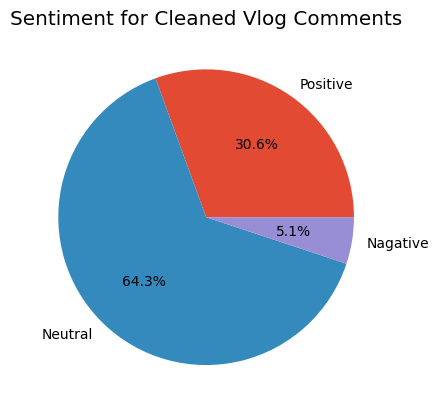

In [32]:
cv_sizes = [vlog_sent_totals_clean[0] / sum(vlog_sent_totals_clean), vlog_sent_totals_clean[1] / sum(vlog_sent_totals_clean), vlog_sent_totals_clean[2] / sum(vlog_sent_totals_clean)]
fig, ax = plt.subplots()
ax.pie(cv_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Cleaned Vlog Comments")

# Raw pi charts

Text(0.5, 1.0, 'Sentiment for Raw Beauty Comments')

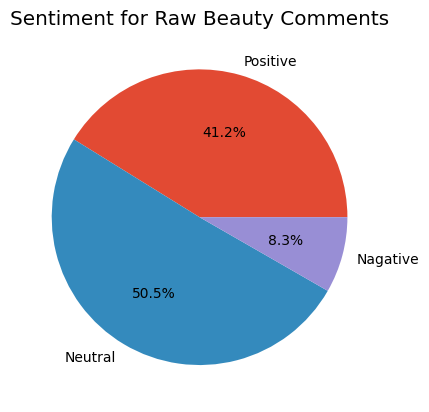

In [34]:
rb_sizes = [beauty_sent_totals_raw[0] / sum(beauty_sent_totals_raw), beauty_sent_totals_raw[1] / sum(beauty_sent_totals_raw), beauty_sent_totals_raw[2] / sum(beauty_sent_totals_raw)]
fig, ax = plt.subplots()
ax.pie(rb_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Raw Beauty Comments")

Text(0.5, 1.0, 'Sentiment for Raw Controversial Comments')

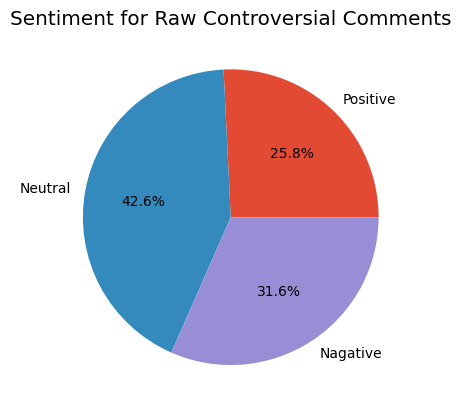

In [36]:
rc_sizes = [controversial_sent_totals_raw[0] / sum(controversial_sent_totals_raw), controversial_sent_totals_raw[1] / sum(controversial_sent_totals_raw), controversial_sent_totals_raw[2] / sum(controversial_sent_totals_raw)]
fig, ax = plt.subplots()
ax.pie(rc_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Raw Controversial Comments")

Text(0.5, 1.0, 'Sentiment for Raw Gaming Comments')

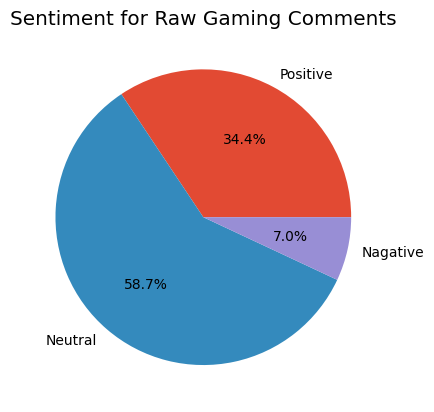

In [37]:
rg_sizes = [gaming_sent_totals_raw[0] / sum(gaming_sent_totals_raw), gaming_sent_totals_raw[1] / sum(gaming_sent_totals_raw), gaming_sent_totals_raw[2] / sum(gaming_sent_totals_raw)]
fig, ax = plt.subplots()
ax.pie(rg_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Raw Gaming Comments")

Text(0.5, 1.0, 'Sentiment for Raw Music Comments')

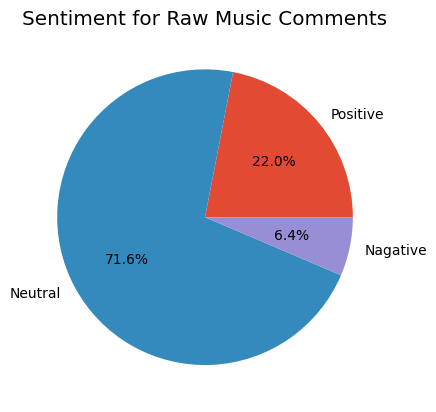

In [39]:
rm_sizes = [music_sent_totals_raw[0] / sum(music_sent_totals_raw), music_sent_totals_raw[1] / sum(music_sent_totals_raw), music_sent_totals_raw[2] / sum(music_sent_totals_raw)]
fig, ax = plt.subplots()
ax.pie(rm_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Raw Music Comments")

Text(0.5, 1.0, 'Sentiment for Raw Reaction Comments')

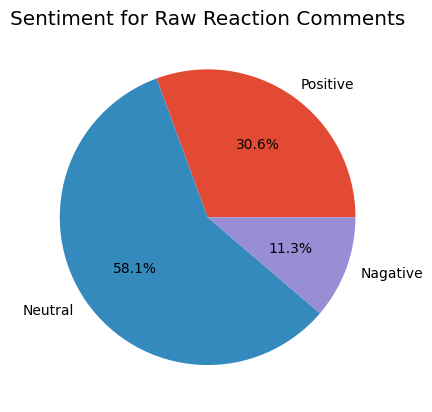

In [40]:
rr_sizes = [reaction_sent_totals_raw[0] / sum(reaction_sent_totals_raw), reaction_sent_totals_raw[1] / sum(reaction_sent_totals_raw), reaction_sent_totals_raw[2] / sum(reaction_sent_totals_raw)]
fig, ax = plt.subplots()
ax.pie(rr_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Raw Reaction Comments")

Text(0.5, 1.0, 'Sentiment for Raw Vlog Comments')

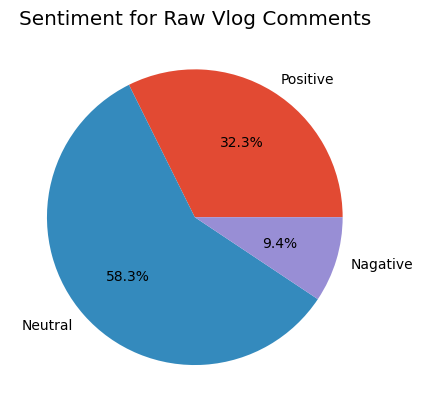

In [41]:
rv_sizes = [vlog_sent_totals_raw[0] / sum(vlog_sent_totals_raw), vlog_sent_totals_raw[1] / sum(vlog_sent_totals_raw), vlog_sent_totals_raw[2] / sum(vlog_sent_totals_raw)]
fig, ax = plt.subplots()
ax.pie(rv_sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Sentiment for Raw Vlog Comments")

# Clean bar graphs

# Raw bar graphs